In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/Shared drives/DATA_690_deep_learning_final_project/')

from snake_game_modified import SnakeGame

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Snake game

In order to create a reinforcement learning model, we decided to use the snake game.

The implementation of the game we used, can be found here: https://github.com/slavadev/snake_nn/blob/master/snake_game.py

But we modified slightly to meet our needs.

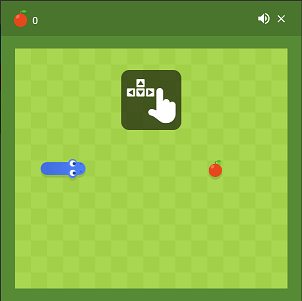

Photo credit: google.com



# Reinforcement Learning

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

Reference: https://en.wikipedia.org/wiki/Reinforcement_learning

#Q Table

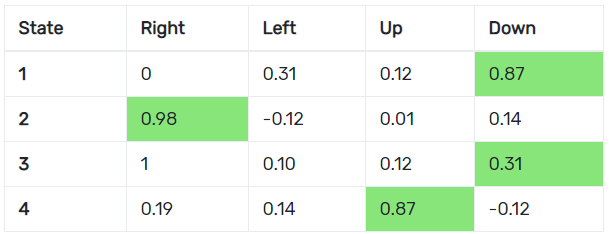


# Bellman equation

A well known equation used for reinforment learning:

$$Q(s,a)=r(s,a)+\gamma\max_aQ(s',a)$$

Where $Q$ is the quality value function, $r$ is the reward function, $s$ is the state at any given time, $a$ is the action taken based on the state, and $\gamma$ is a discounting factor.

The idea is that the agent (in our case the snake) wants to take the action at any given state that maximizes the Q value. And this Q value is dependant on future states.

Reference: https://en.wikipedia.org/wiki/Bellman_equation

# Deep Q Network

Because the equation above requires a brute-force approach, it is often costly to implement it depending on the complexity of the game. So instead, we modify the equation slightly in order to implement it as our loss function for our deep learning model:

$$[Q(s,a,\theta)-(r(s,a)+\gamma\max_aQ(s',a,\theta))]^2$$

In this situation $Q$ is our netwok that is trying best estimate the quality values by calibrating $\theta$.

Reference: https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677

In [ ]:
def bellman_loss_function(max_current_q, current_reward, max_future_q=None, gamma=.85):
  current_reward = moveTo(torch.tensor(current_reward), device)
  gamma = moveTo(torch.tensor(gamma), device)
  if max_future_q is not None:
    return torch.pow(torch.subtract(max_current_q, torch.add(current_reward, torch.multiply(gamma, max_future_q))), 2)
  else:
    return torch.pow(torch.subtract(max_current_q, current_reward), 2)

# Implementation

## State:

In [ ]:
game = SnakeGame(board_width = board_width-2, board_height = board_height-2, gui = False)

state = np.zeros((1,1,board_width,board_height), dtype=int)

done, score, snake, food, reward = game.start()

for snake_point in snake:
    state[0, 0, snake_point[0], snake_point[1]] = 1

state[0, 0, food[0], food[1]] = 2

print(state)

[[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 

## Actions:

0 - 3 integers representing *up, right, down, left* moves.

So for the game above, we can make a random move like this:


In [ ]:
action = random.randint(0, 3)
done, score, snake, food, reward = game.step(action)
print(action)

2


And the new state would be as follows:

In [ ]:
state = np.zeros((1,1,board_width,board_height), dtype=int)

for snake_point in snake:
    state[0, 0, snake_point[0], snake_point[1]] = 1

state[0, 0, food[0], food[1]] = 2

print(state)

[[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0 0 

## Reward function

Initially, we had implemented our game where the reward was 1 for each move that lead to eating an apple, -1 for crashing (and ending the game), and 0 for all other moves.

Eventually (on a recommendation from Dr. Raff), we implemented a reward function that returns a slightly higher value whenever the snake gets closer to the apple.

We calculate Eucledian distance between the head of the snake and the apple, then multiply its reciprocal to the rate of return, and finally add the result to the actual reward from the move. This means that as the snake gets closer, the return gets bigger but only by a tiny fraction which is controlled by the rate of return:

$$r(s, f, v) = \rho\left[\frac{1}{\sqrt{(f_0 - s_0)^2 + (f_1 - s_1)^2}}\right]+v$$

Where $s$ is the position of the head of the snake, $f$ is the position of the food, $v$ is the reward returned by the game (-1, 0, or 1) and $\rho$ is the rate that controls how much of the distance function to return.



In [ ]:
def get_reward(snake, food, reward, rho = 0.1):
  snake_head = snake[0]
  x_distance = np.subtract(food[0], snake_head[0])
  y_distance = np.subtract(food[1], snake_head[1])
  euclidean_distance = np.sqrt(np.add(np.power(x_distance, 2), np.power(y_distance, 2)))
  if euclidean_distance > 0 and reward > -1:
    return np.add(np.multiply(np.divide(1,euclidean_distance), rho), reward)
  else:
    return reward

## Q function

And finally, our Q function essentially our deep learning model. The input was the state and the output was a vector with the Q value for each move.

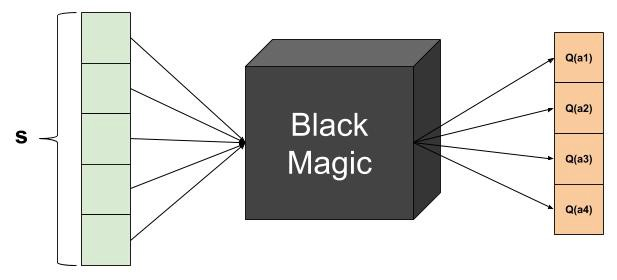

Photo credit: https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677

# Process

## Training

Our model "played the game" and we collected the data (state, reward, future state), and once the model played a predifined set of rounds (a batch), we "trained" our model with that data.

Initially, we only trained one model which made the Q value predictions for both the current state and the future state.

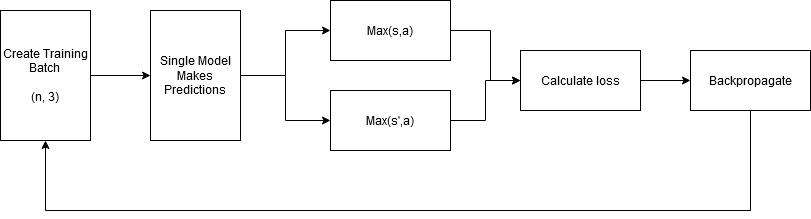




This didn't yield good results, so we modified the process based on the article that we used for a lot of our information.

Instead of consistently using one model. We used one model that was continually training and we used for estimating the current Q value an we had another model that was semi-constant and it predicted the future Q value. After n-number of training rounds, the semi-constant model was replaced with the up-to-date model.

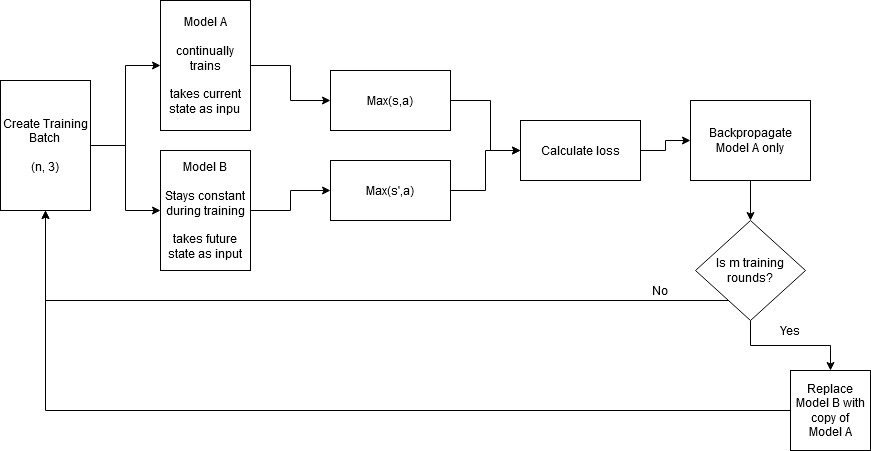


## Exploration

Since we were still not getting good results, we tried a common practice in reinforcement training where we can use a threshold $\epsilon$ where $0 < \epsilon < 1$. So when it's time to take an action, we randomly select a number from a Gaussian distriburion and take a random action if the randomly selected number is below $\epsilon$

This allows the model to explore instead of always selecting the safest choice.

The code looks like this:

In [ ]:
if random.gauss(.5, .25) > epsilon:
  with torch.no_grad():
    q = trainable_model(state_tensor)
  max_q, action = torch.max(q, 1)
  action = action.detach().cpu().item()
else:
  action = random.randint(0, 3)

## Hyper parameter tuning

Trying new things to improve the performance of our model, was very manual (and painful), so we used a package recommended by Dr. Raff (optuna) to perform some hyperparameter tuning. We decided to play arund with these parameters:

* **Batch size** - size of training data at each round
* **$\epsilon$** - threshold used to allow the model to explore unsafe moves
* **Training rounds**
* **Number of hidden layers**
* **Learning rate**
* **$\gamma$** - discount rate in Bellman equation
* **Swith model threshold** - when to switch Model B with Model A
* **Optimizer**
* **$\rho$** - the proportion of the distance between the head of the snake and the apple to return in the reward function





# Results

They sucked.

The graph below shows each hyperparameter tuning run score for each completed game.

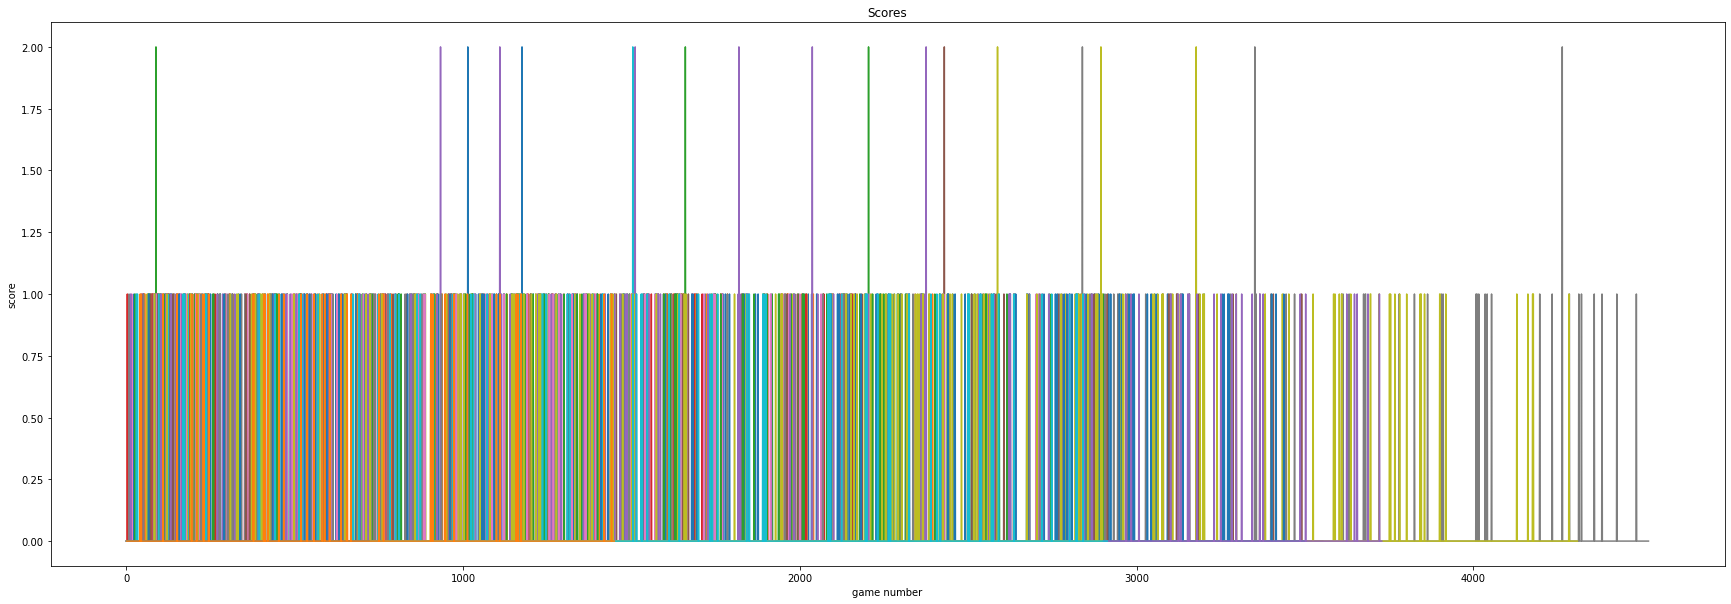

<Figure size 2160x720 with 0 Axes>

In [ ]:
results_path = '/content/gdrive/Shared drives/DATA_690_deep_learning_final_project/results'

plt.ylabel('score')
plt.xlabel('game number')
plt.title(f'Scores')
plt.rcParams["figure.figsize"] = (30,10)

score_results_df = pd.read_csv(f'{results_path}/score_resuts.csv', index_col='hyperparameters')
score_results_df = score_results_df[[col for col in score_results_df.columns if 'game' in col]]

games = list(map(lambda s: s.replace('game_' , ''), score_results_df.columns.values))
games = np.asarray(games).astype(int)
for index, row in score_results_df.iterrows():
  plt.plot(games[:len(row.values)], row.values, label=f'{index}')

# plt.legend()
plt.show()
plt.clf()

And just to give a picture of the difference between the number of zero-point games vs. one-point and two-point games, we printed a histogram for each hyperparameter tuning run.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


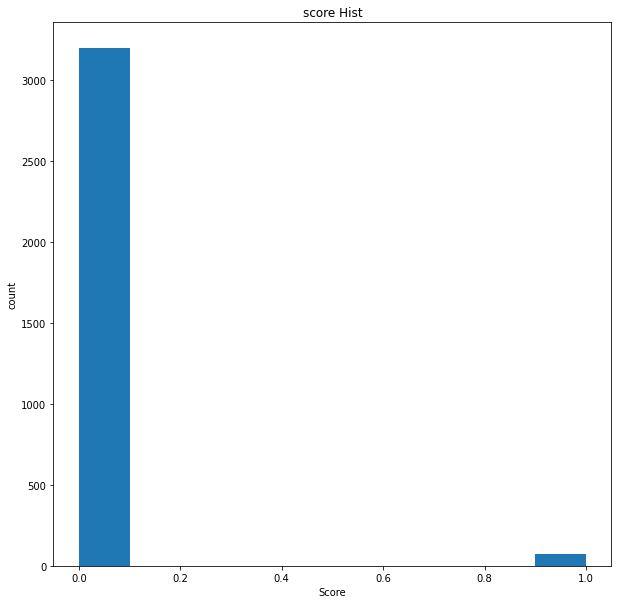

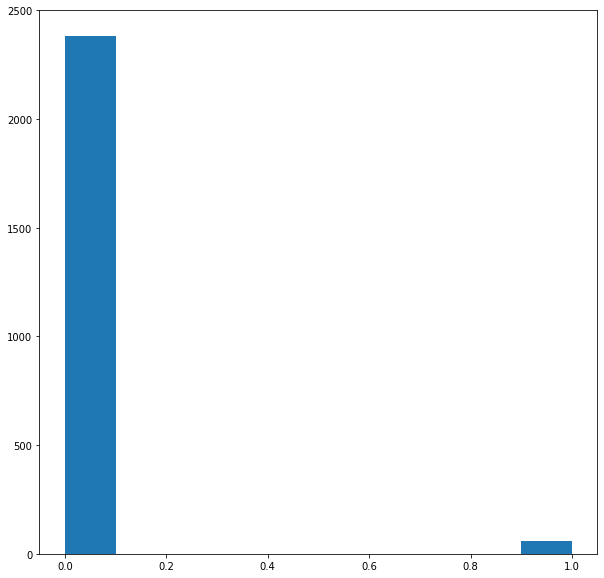

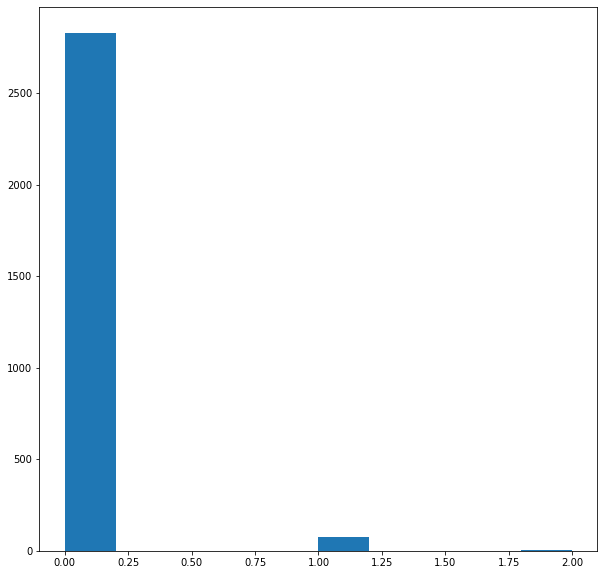

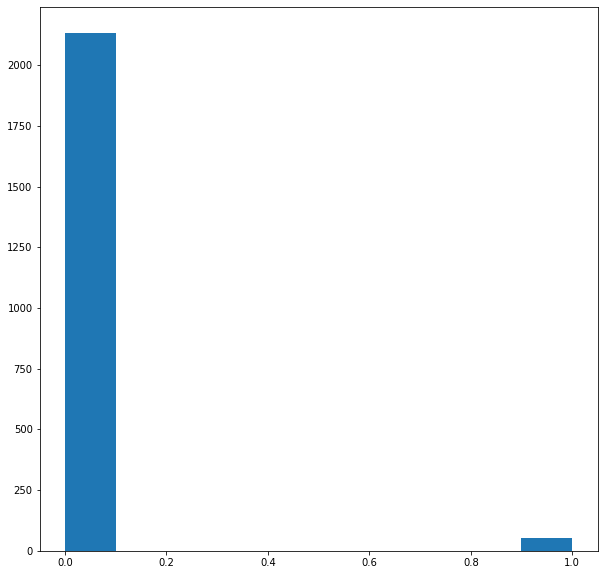

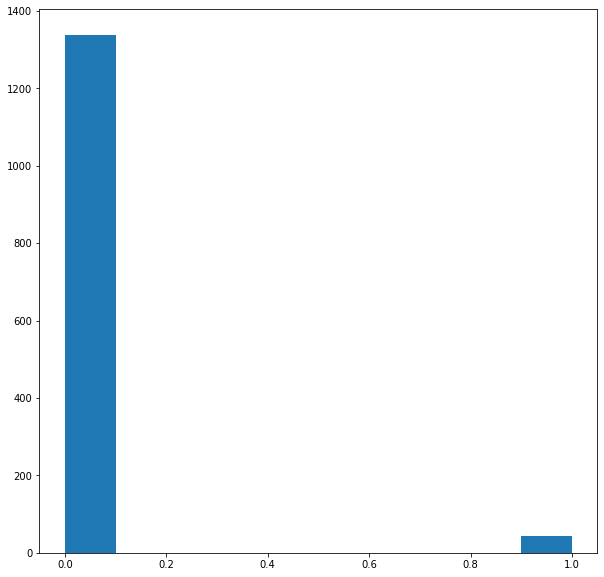

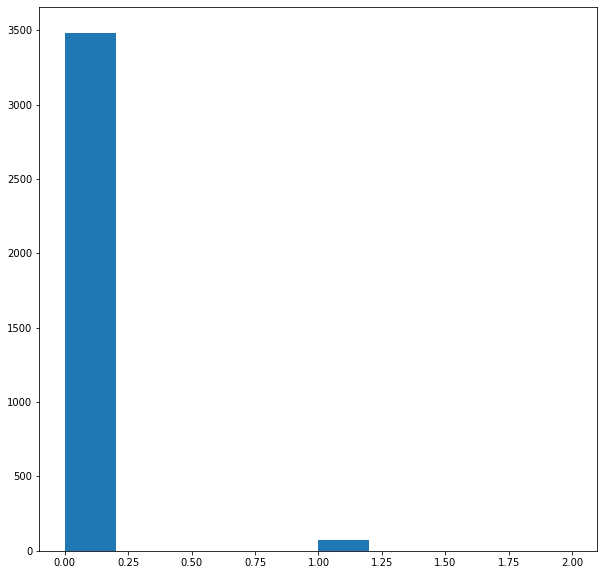

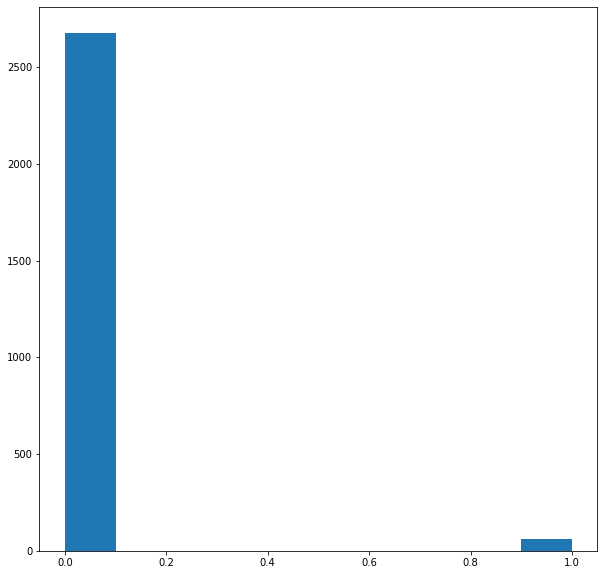

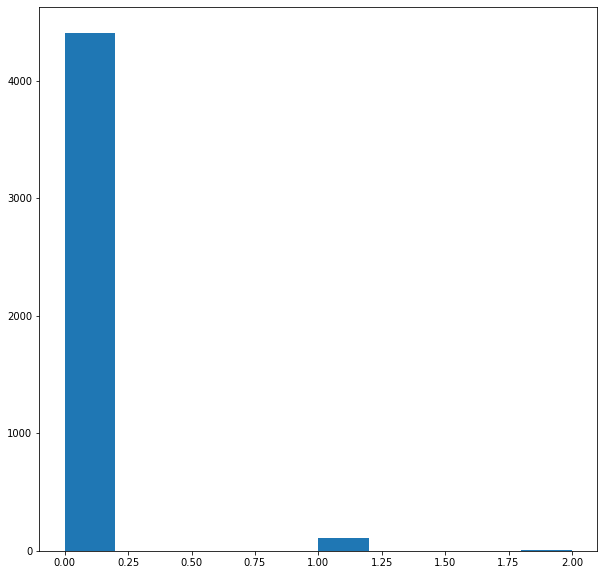

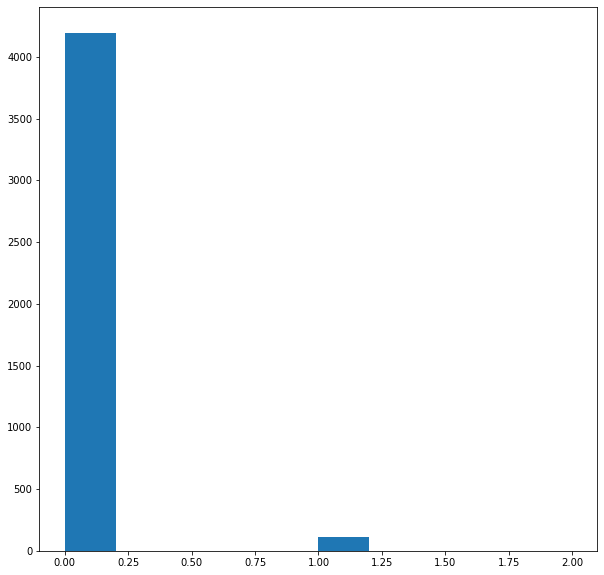

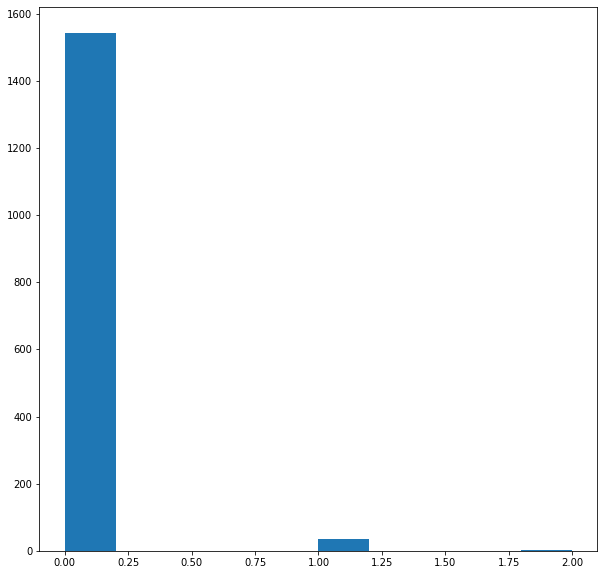

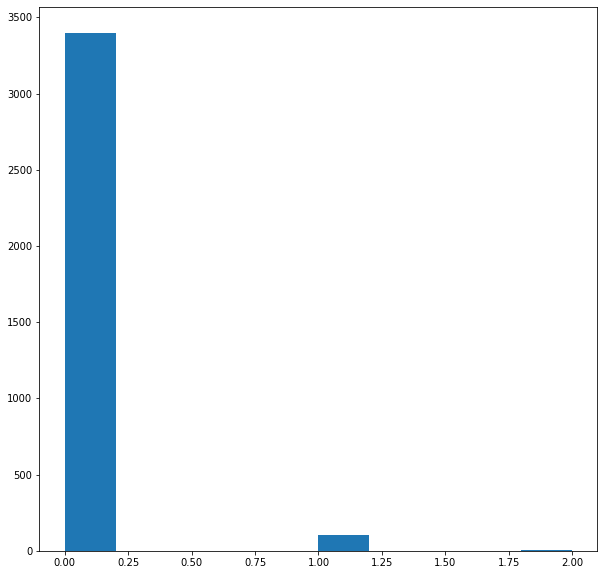

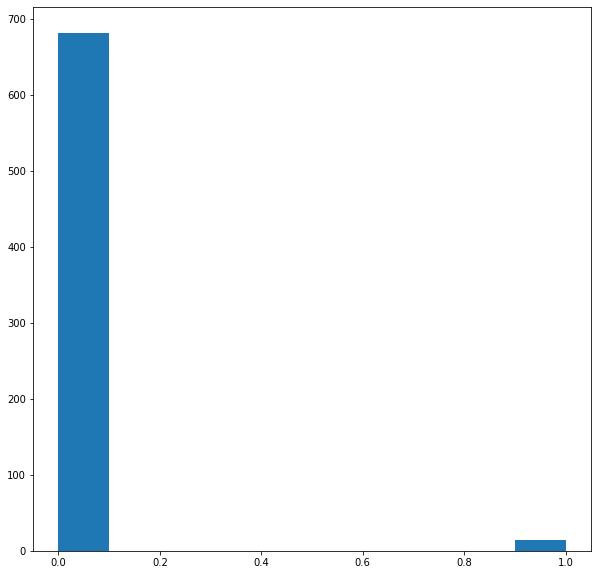

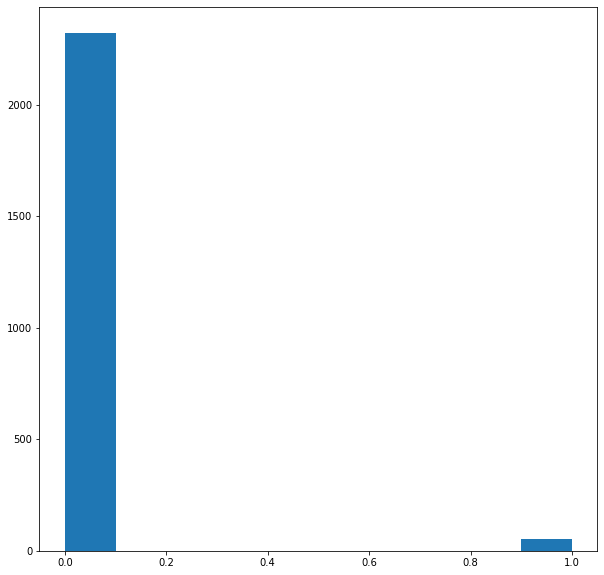

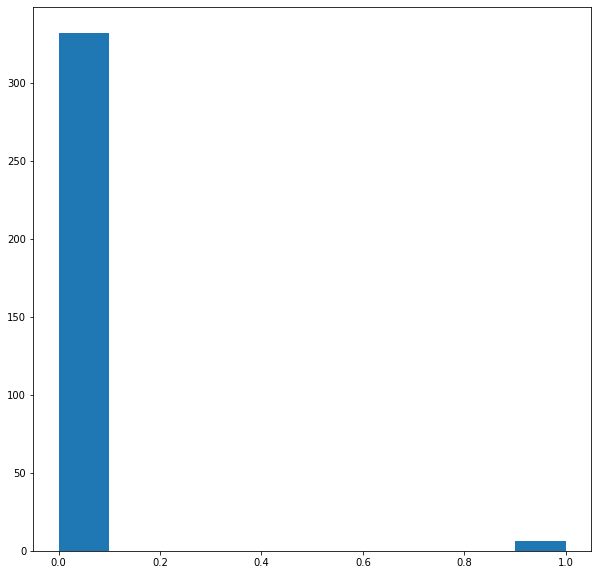

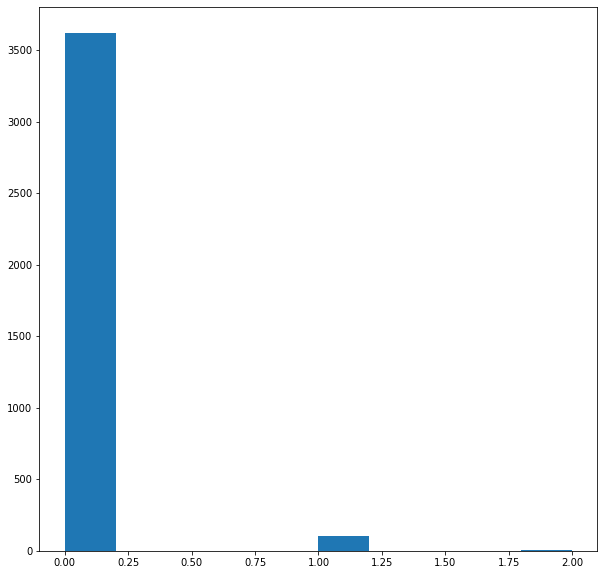

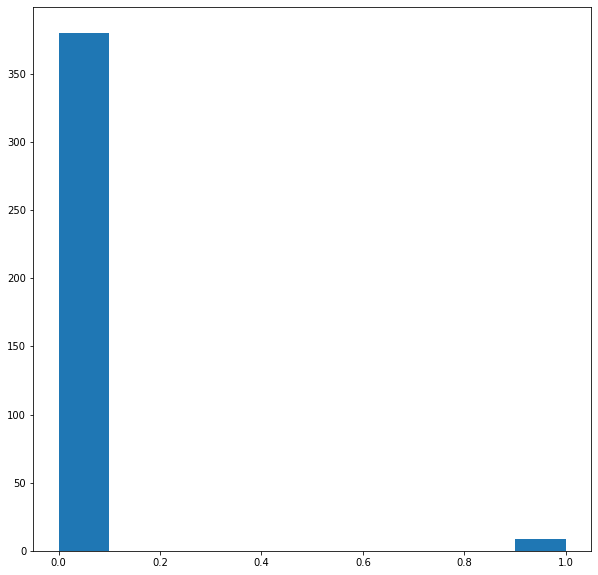

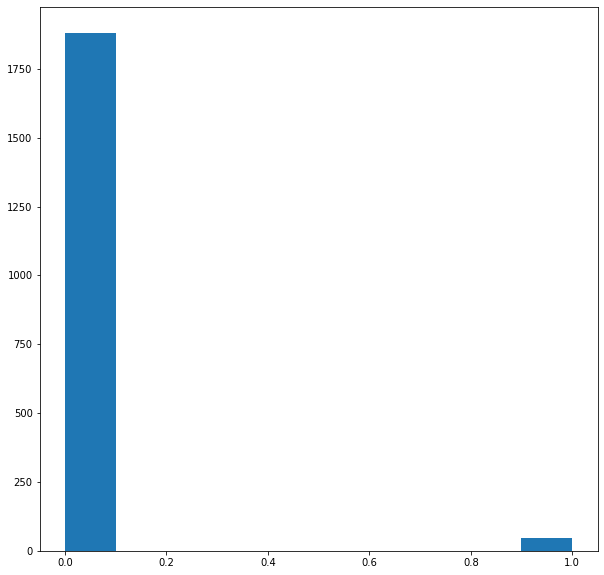

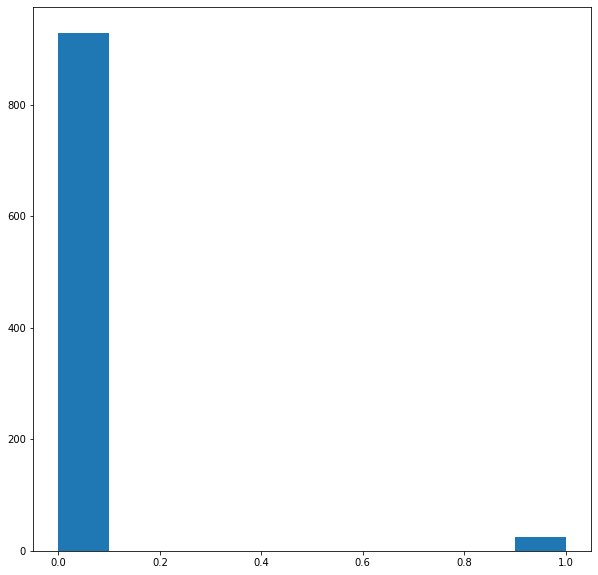

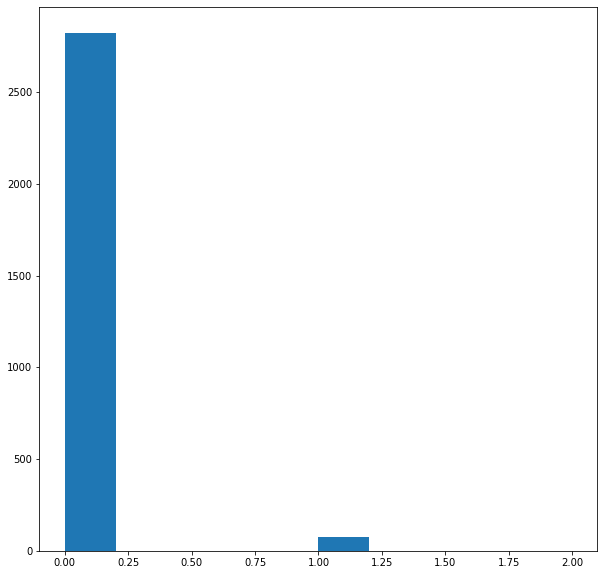

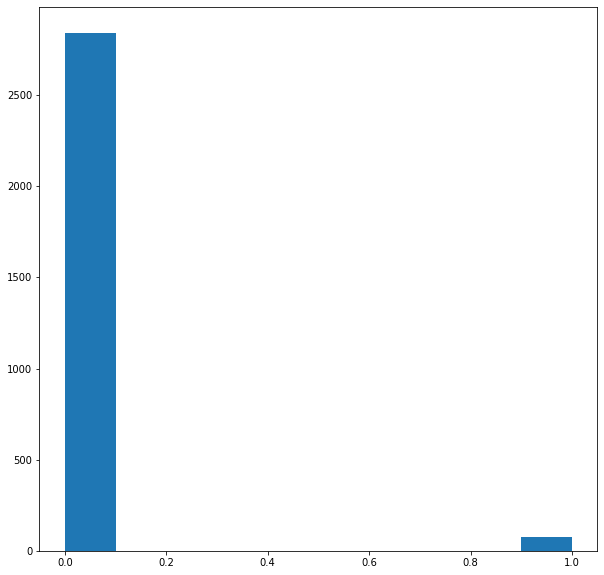

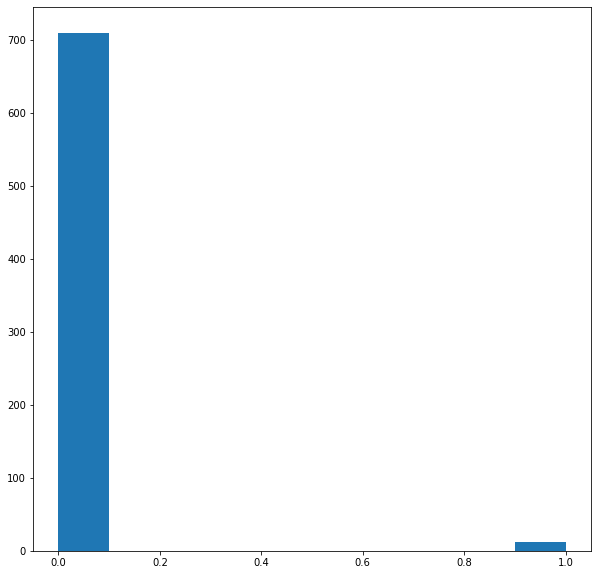

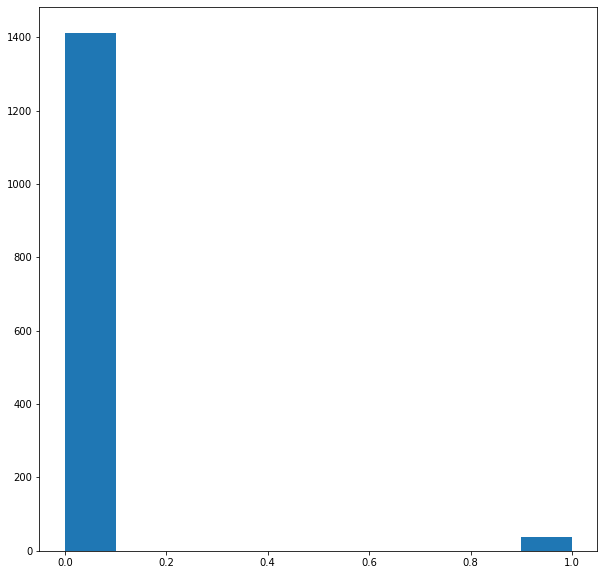

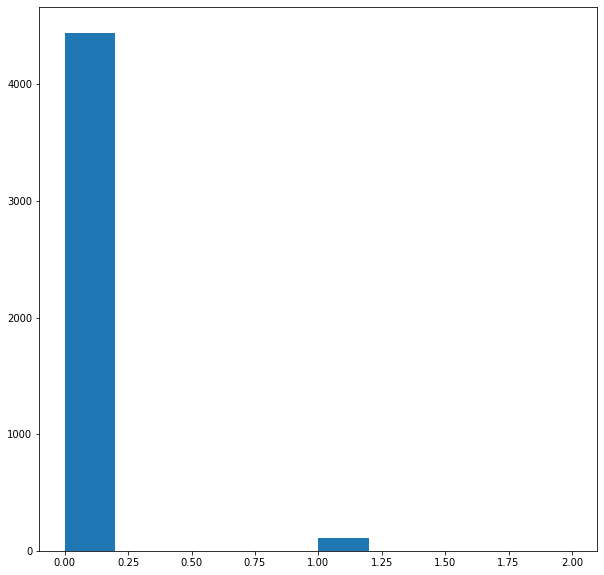

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.ylabel('count')
plt.xlabel('Score')
plt.title(f'score Hist')
plt.rcParams["figure.figsize"] = (10,10)

score_results_df = pd.read_csv(f'{results_path}/score_resuts.csv', index_col='hyperparameters')
score_results_df = score_results_df[[col for col in score_results_df.columns if 'game' in col]]

games = list(map(lambda s: s.replace('game_' , ''), score_results_df.columns.values))
games = np.asarray(games).astype(int)
for index, row in score_results_df.iterrows():
  plt.hist(row.values)
  plt.show()
  plt.clf()

# plt.legend()


We also generated an image similar to the line graph above but showing score of each completed game, but only generating random moves, and there is not really a big difference between our model.

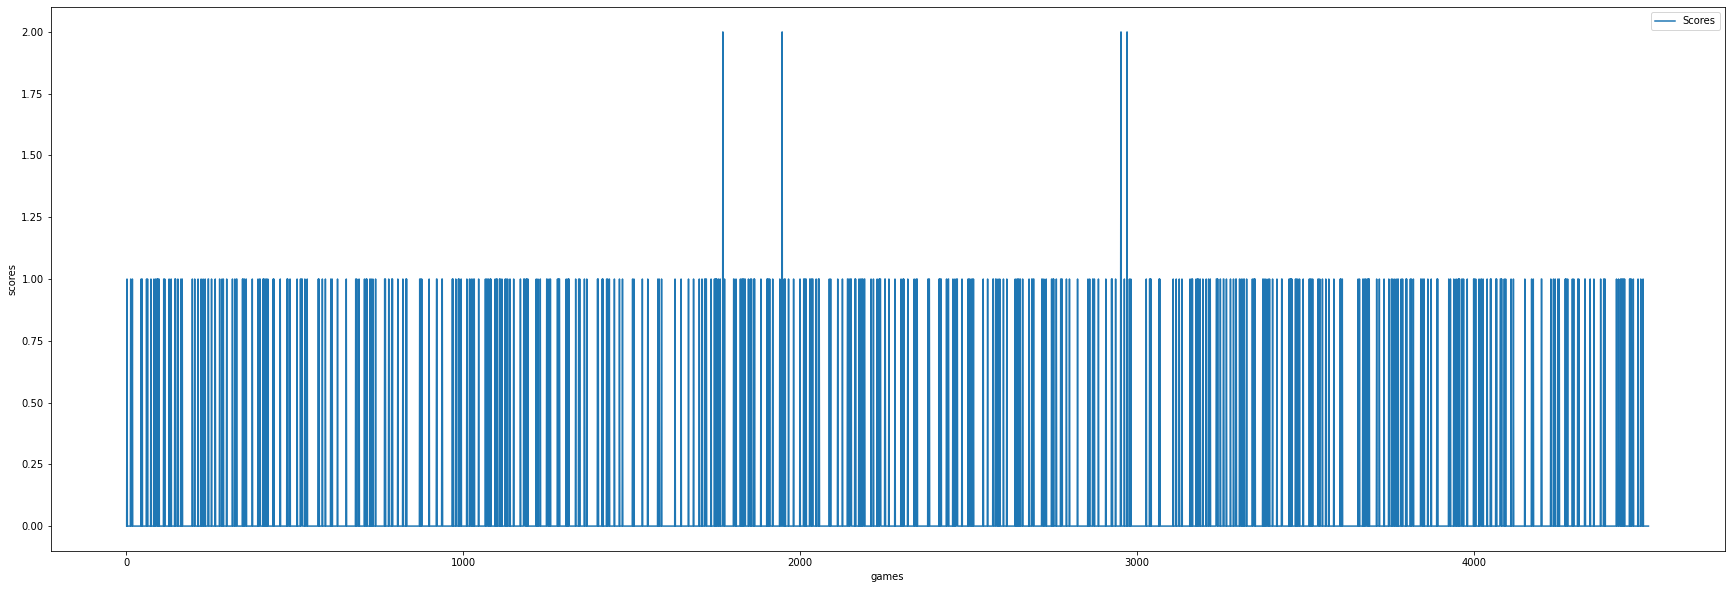

In [ ]:
import random

board_width = 22
board_height = 22

score_results = {
    "games": [],
    "scores": []
}

max_game_number = np.amax(games)

game = SnakeGame(board_width = board_width-2, board_height = board_height-2, gui = False)

done, score, snake, food, reward = game.start()

game_number = 1

while game_number < max_game_number:
  action = random.randint(0, 3)
  done, score, snake, food, reward = game.step(action)
  if done:
      score_results["games"].append(game_number)
      score_results["scores"].append(score)
      game_number += 1
      game = SnakeGame(board_width = board_width-2, board_height = board_height-2, gui = False)
      done, score, snake, food, reward = game.start()

sns.lineplot(x='games', y='scores', data=score_results, label=f'Scores')

We also wanted to see the performance in terms of loss so we printed the graph below and we can see that all hyperparameter tuning runs seem to have a loss very close to zero for most of their training.

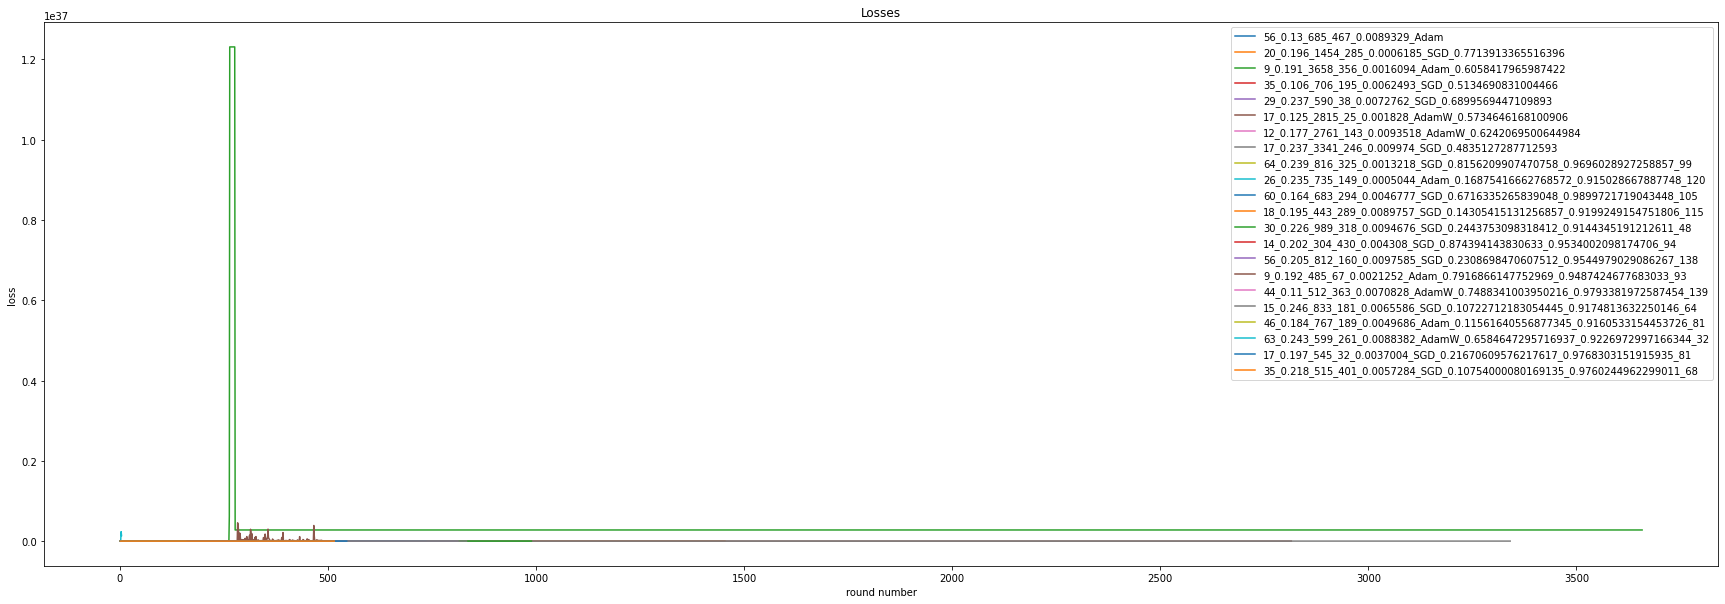

<Figure size 2160x720 with 0 Axes>

In [ ]:
plt.ylabel('loss')
plt.xlabel('round number')
plt.title(f'Losses')
plt.rcParams["figure.figsize"] = (30,10)

loss_results_df = loss_results_df = pd.read_csv(f'{results_path}/loss_resuts.csv', index_col='hyperparameters')
loss_results_df = loss_results_df[[col for col in loss_results_df.columns if 'round' in col]]

rounds = list(map(lambda s: s.replace('round_' , ''), loss_results_df.columns.values))
rounds = np.asarray(rounds).astype(int)
for index, row in loss_results_df.iterrows():
  plt.plot(games[:len(row.values)], row.values, label=f'{index}')

plt.legend()
plt.show()
plt.clf()

In order to see the patterns in more detail, we scaled the loss to log scale, so we can elimiate the high variance and we couldn't identify any patterns that may help us.

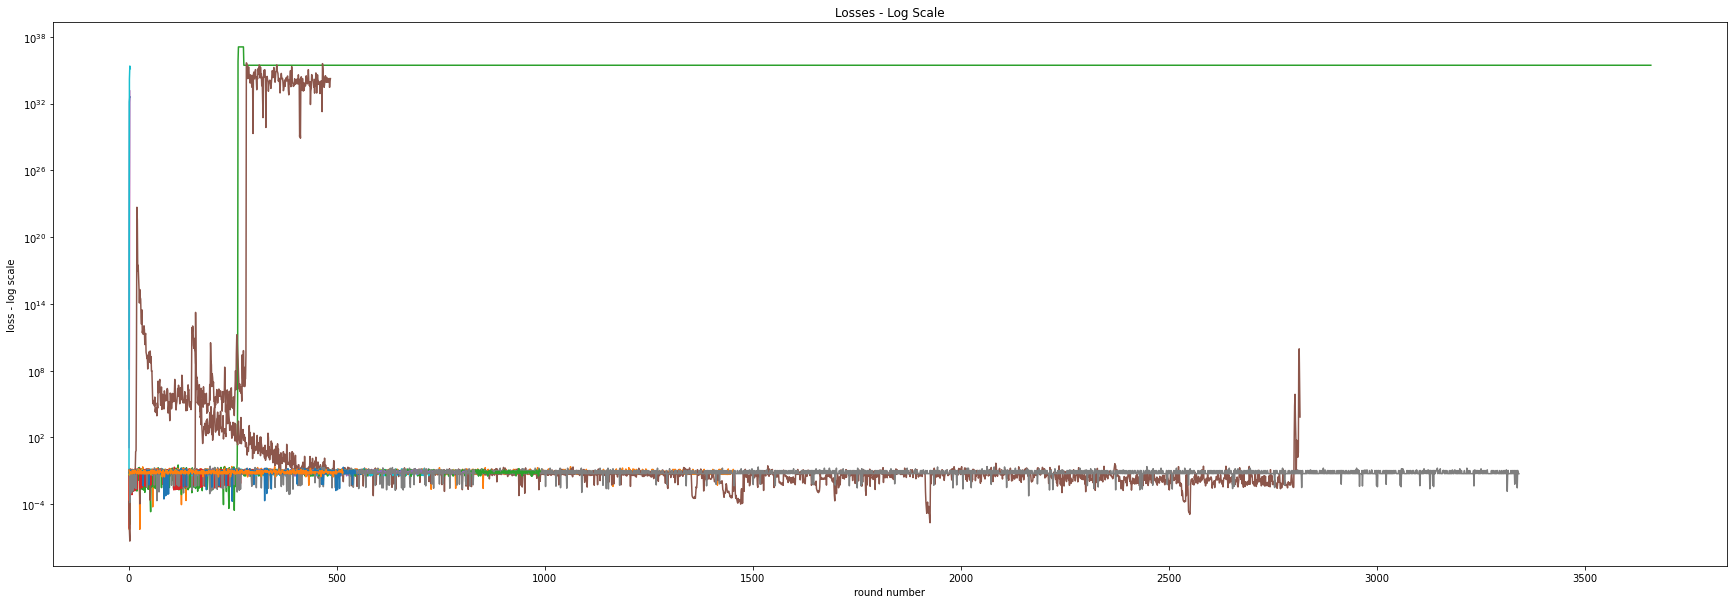

In [ ]:
plt.ylabel('loss - log scale')
plt.xlabel('round number')
plt.title(f'Losses - Log Scale')
plt.rcParams["figure.figsize"] = (30,10)


for index, row in loss_results_df.iterrows():
  plt.plot(games[:len(row.values)], row.values, label=f'{index}')

# plt.legend()
plt.yscale('log')
plt.show()

As a last ditch effort before our presentation, we decided to change the intention of the $\rho$ parameter in the reward function, and set it to integers between 5 and 10 instead of it being a fraction. The idea was that by increasing the reward, the loss would be bigger and that would give the model room to learn. We also decreased the threshold for a few of the other parameters in order to drastically decrease training time. But as seen below, that didn't work either.

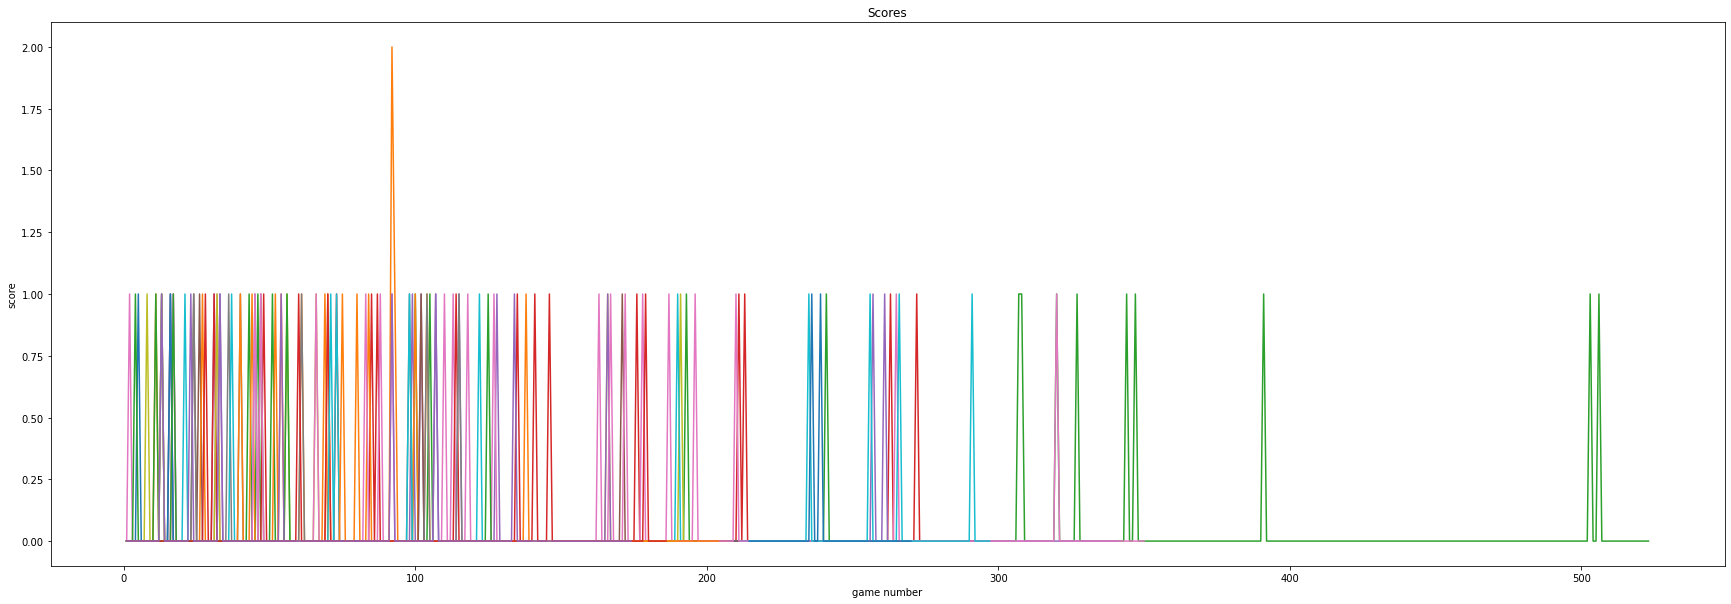

<Figure size 2160x720 with 0 Axes>

In [ ]:
plt.ylabel('score')
plt.xlabel('game number')
plt.title(f'Scores')
plt.rcParams["figure.figsize"] = (30,10)

score_results_df = pd.read_csv(f'{results_path}/score_resuts_v2.csv', index_col='hyperparameters')
score_results_df = score_results_df[[col for col in score_results_df.columns if 'game' in col]]

games = list(map(lambda s: s.replace('game_' , ''), score_results_df.columns.values))
games = np.asarray(games).astype(int)
for index, row in score_results_df.iterrows():
  plt.plot(games[:len(row.values)], row.values, label=f'{index}')

# plt.legend()
plt.show()
plt.clf()

The loss graph for our last attempt is seen below.

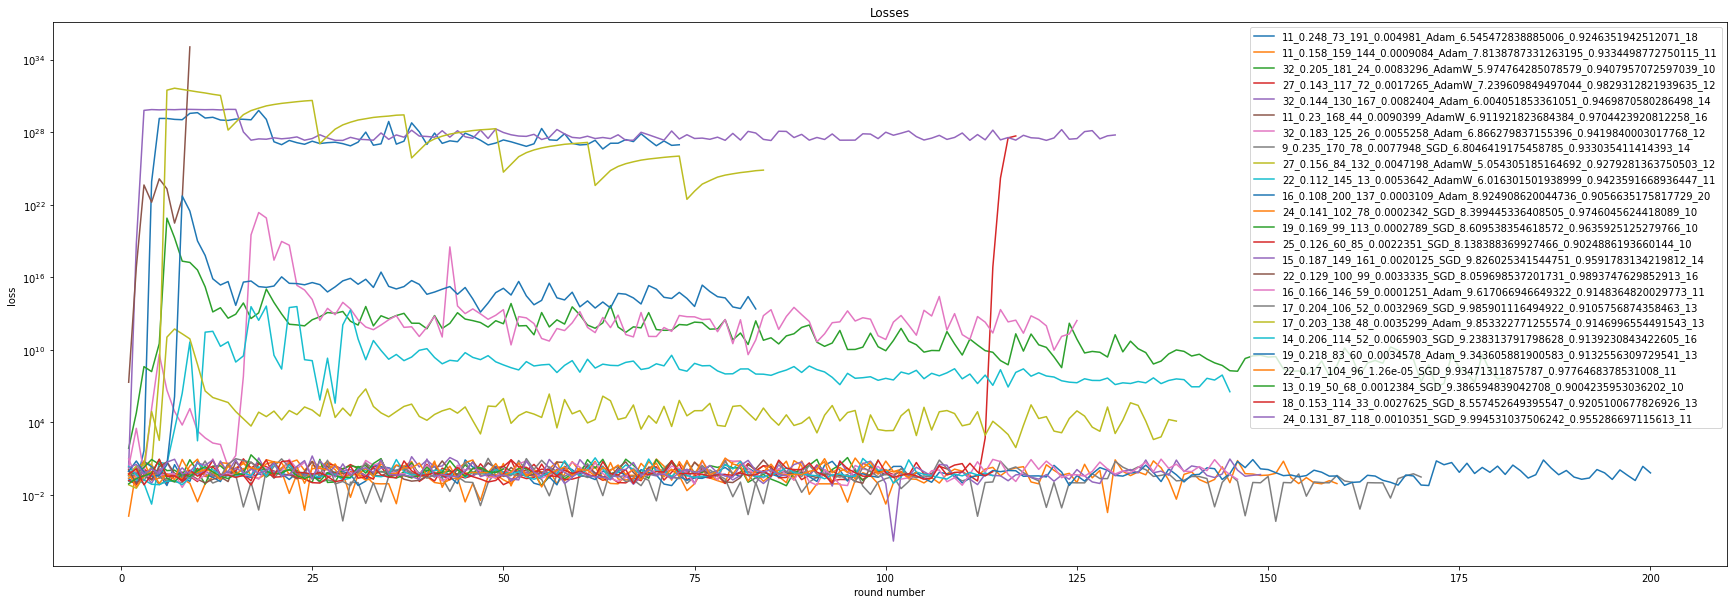

<Figure size 2160x720 with 0 Axes>

In [ ]:
plt.ylabel('loss')
plt.xlabel('round number')
plt.title(f'Losses')
plt.rcParams["figure.figsize"] = (30,10)

loss_results_df = loss_results_df = pd.read_csv(f'{results_path}/loss_resuts_v2.csv', index_col='hyperparameters')
loss_results_df = loss_results_df[[col for col in loss_results_df.columns if 'round' in col]]

rounds = list(map(lambda s: s.replace('round_' , ''), loss_results_df.columns.values))
rounds = np.asarray(rounds).astype(int)
for index, row in loss_results_df.iterrows():
  plt.plot(games[:len(row.values)], row.values, label=f'{index}')

plt.legend()
plt.yscale('log')
plt.show()
plt.clf()

# Discussion

Trained models are not any better than making random choices. In order to improve the model's accuracy, these are some steps that can be taken:



1. Check the game's code to make sure it's accurate
2. Check for bugs in code
3. Explore changing the reward function

